In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
dt = pd.read_csv('test.csv')
dt.head() # view our dataset after loading

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
##1460 individual points
df = pd.read_csv('train.csv')
dt.head() # view our dataset after loading

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<AxesSubplot:>

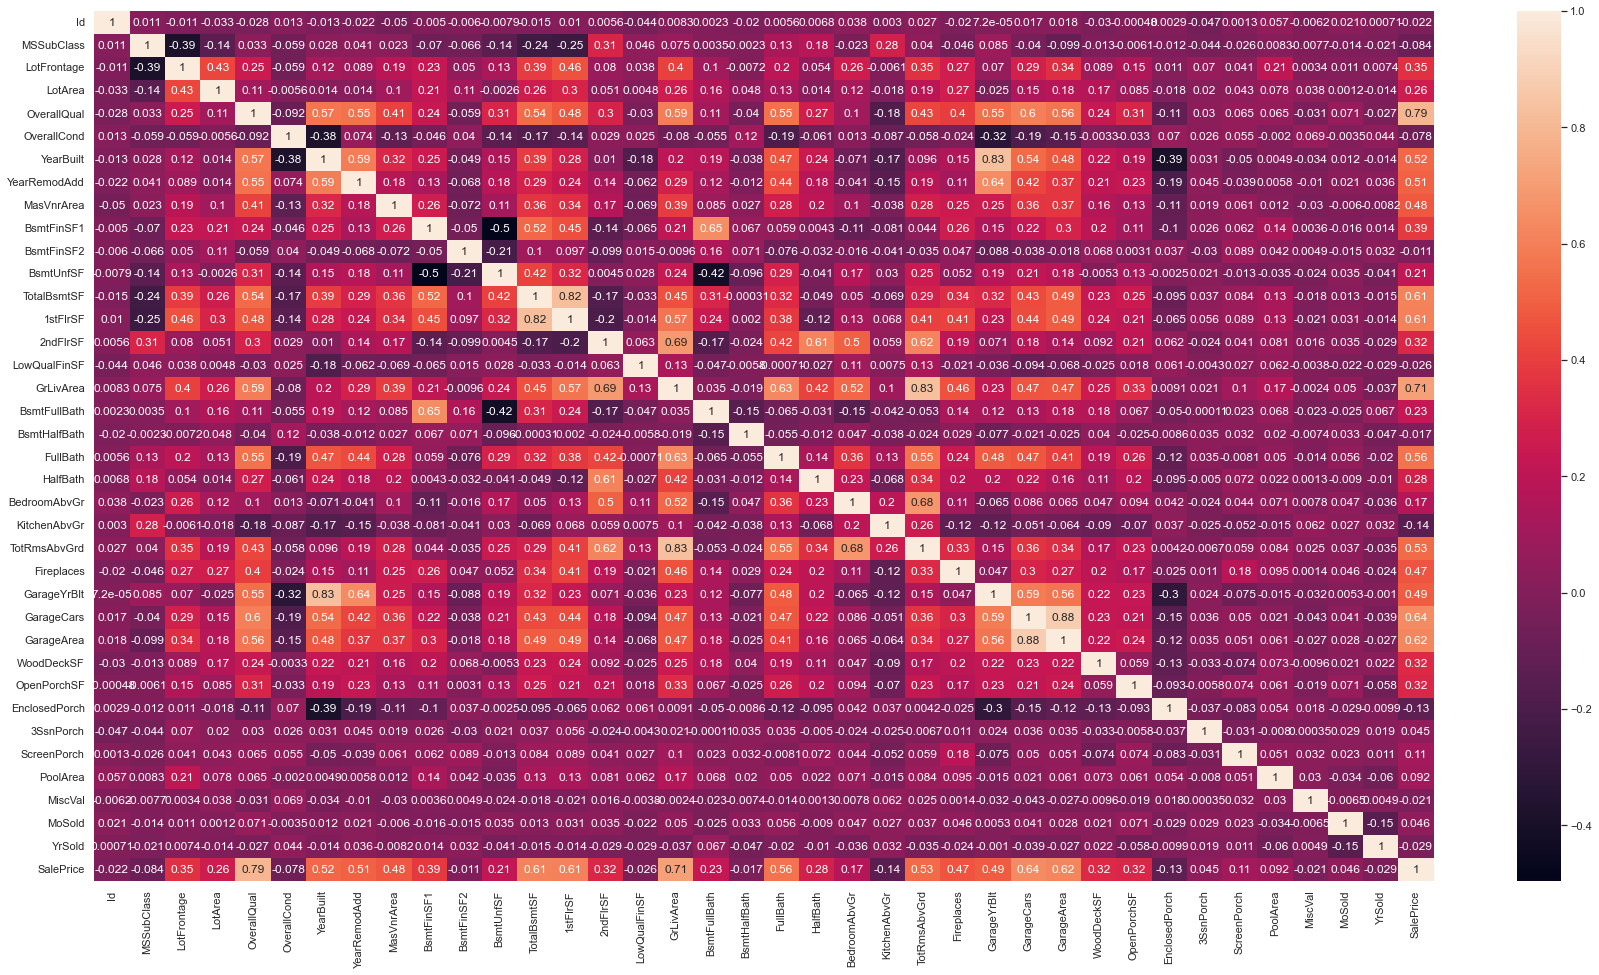

In [13]:
corr = df.corr() # allows us to get the correlations
sns.set(rc = {'figure.figsize':(30,16)})
sns.heatmap(corr, annot=True) # annot=True adds the values

<AxesSubplot:>

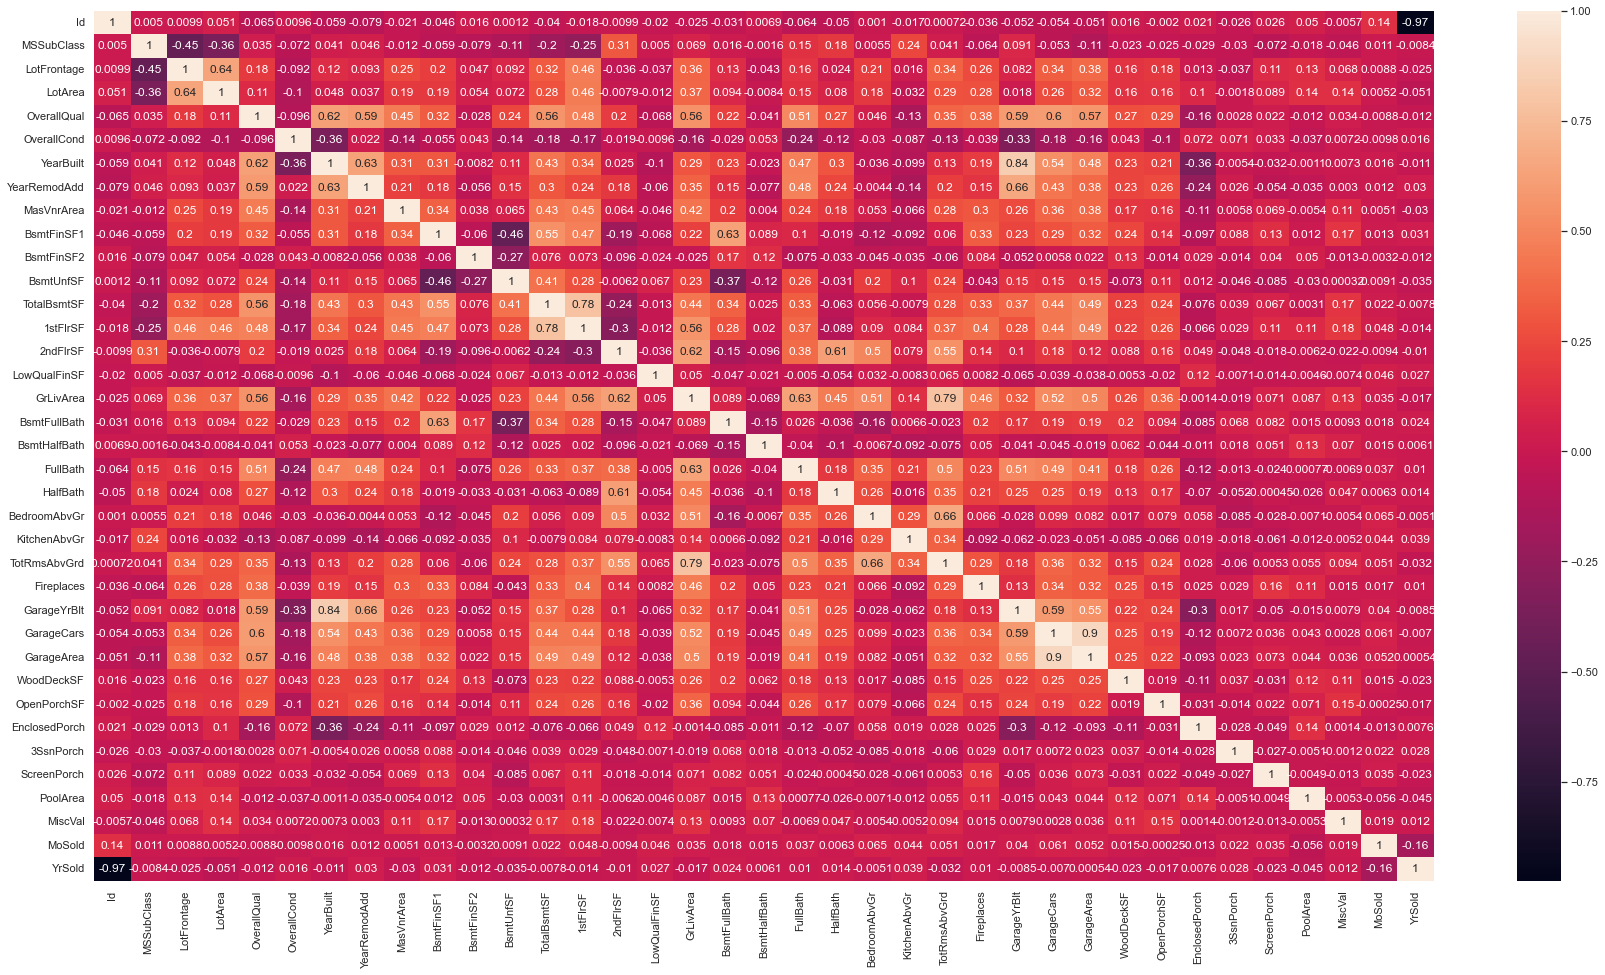

In [15]:
corr2 = dt.corr() # allows us to get the correlations
sns.heatmap(corr2, annot=True) # annot=True adds the values

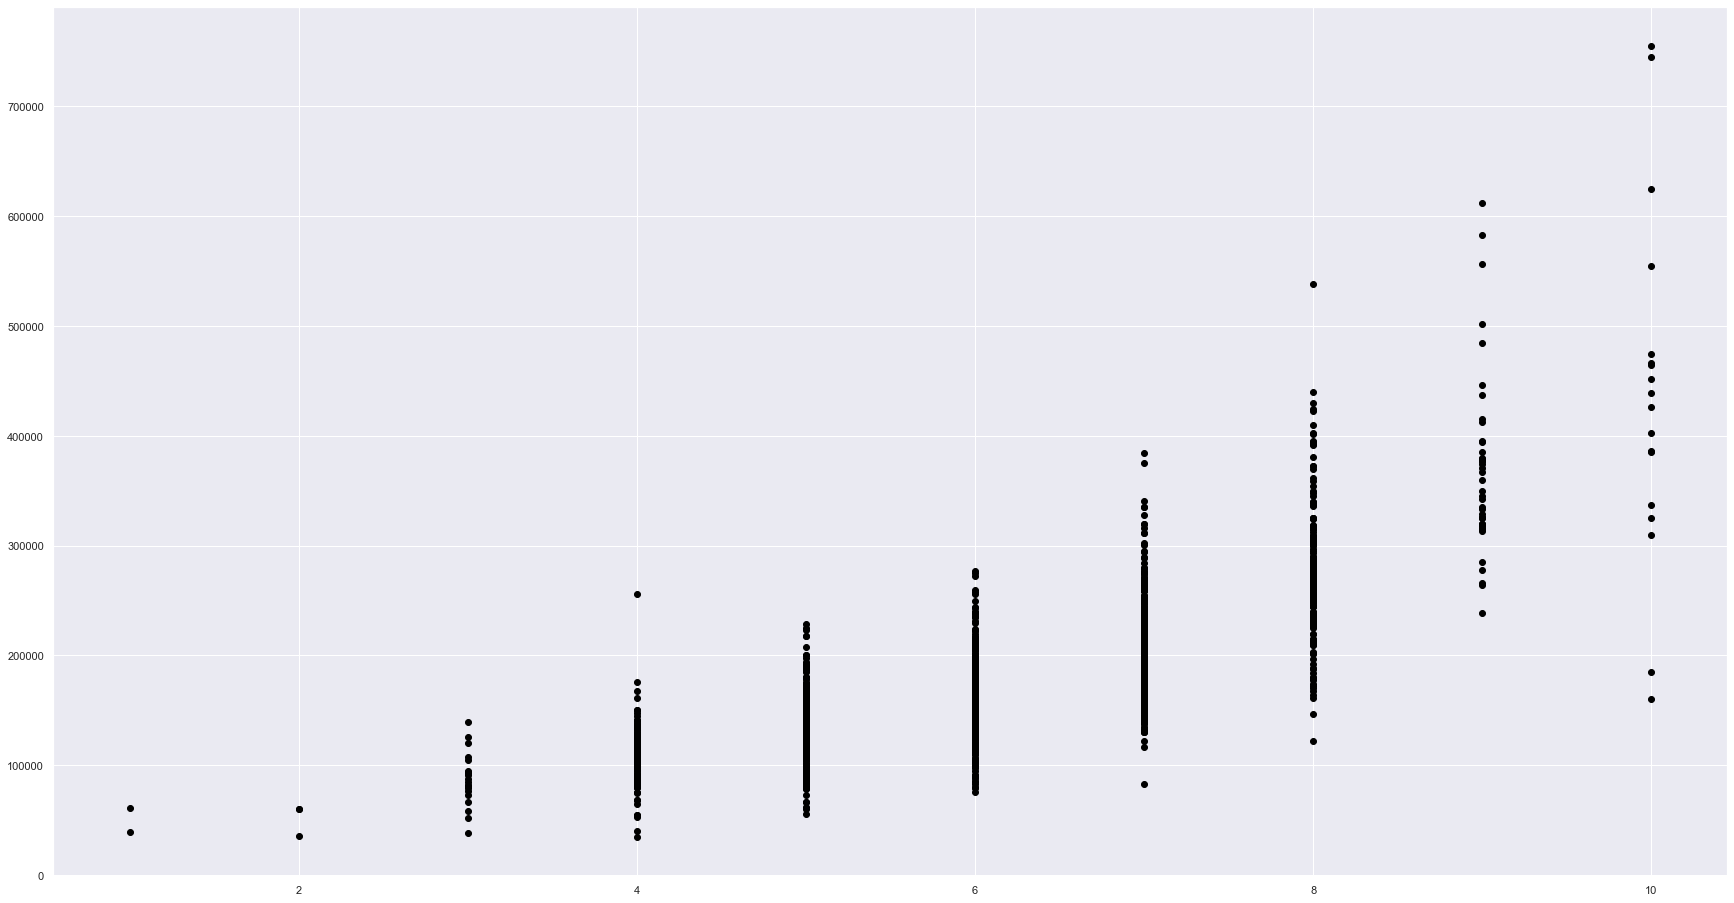

In [16]:
plt.scatter(df.OverallQual, df.SalePrice,  color='black')

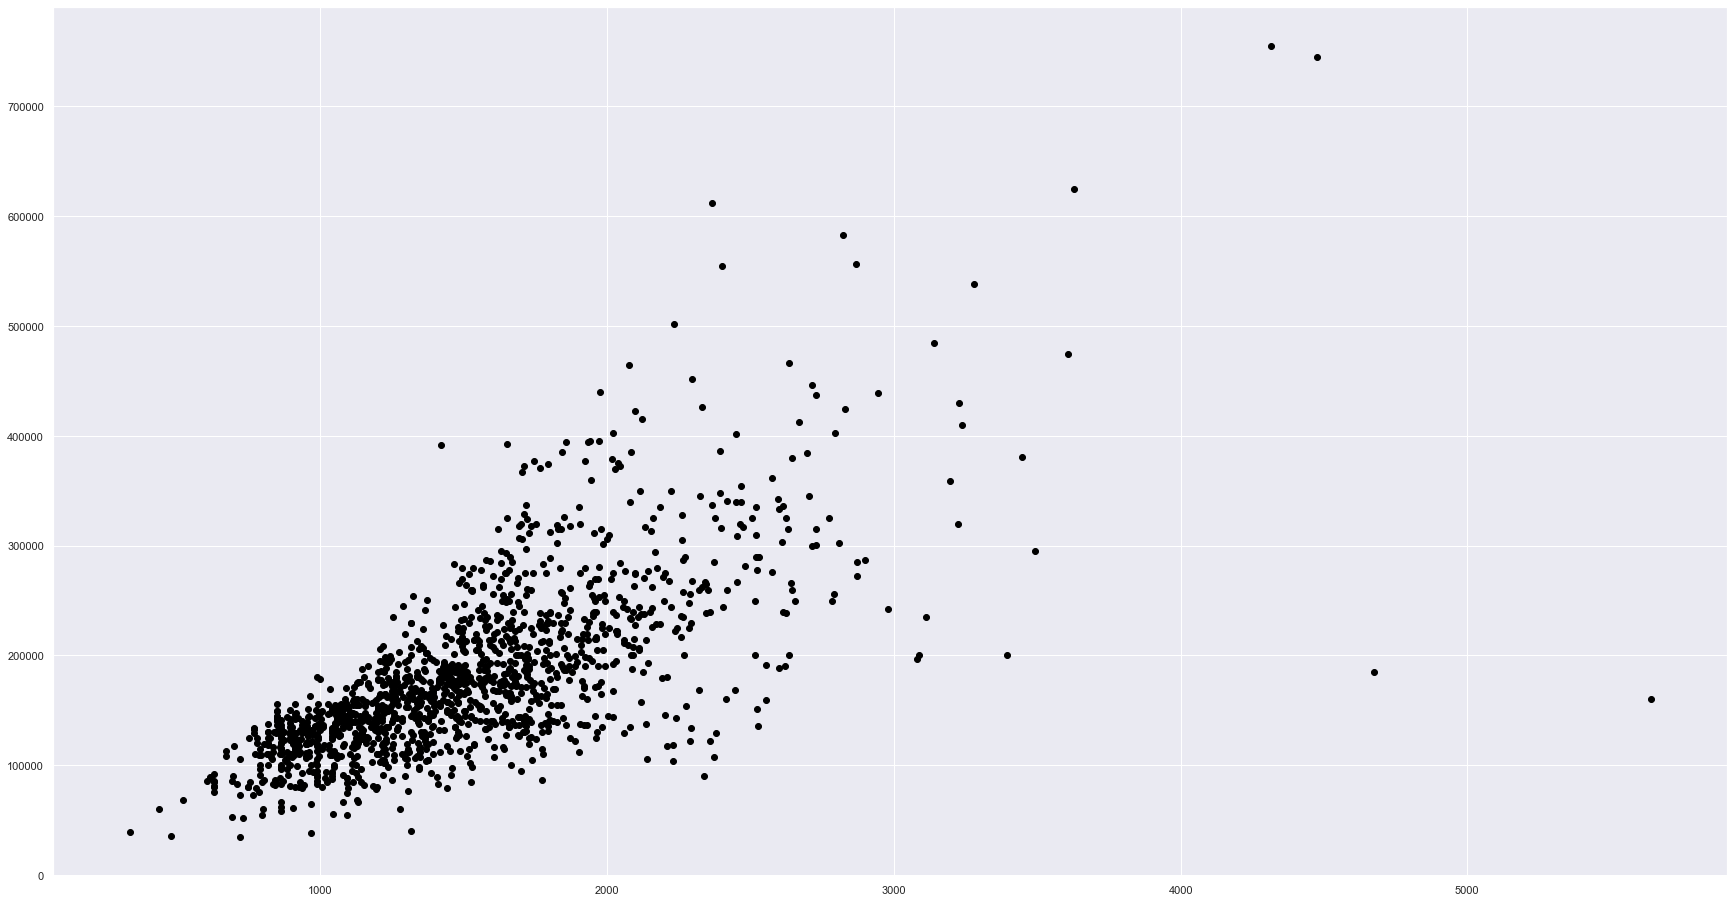

In [17]:
plt.scatter(df.GrLivArea, df.SalePrice,  color='black')

In [18]:
# Define our features and target
X = df[['GrLivArea']]
y = df['SalePrice']

# Split into train and test. By default, 75% of data is assigned to train, the other 25% to test.
X_train = X[:-25]
X_test = X[-25:]

y_train = y[:-25]
y_test = y[-25:]
#x_train, x_test, y_train, y_test = train_test_split(X, y)

In [19]:
# Initialize a linear regression model object
lr = linear_model.LinearRegression()


# Fit the linear regression model object to our data
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# The coefficients
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [107.31945455]
Intercept: 
 18193.026316386124


In [140]:
y_pred = lr.predict([[1200]]) 
print(y_pred)

[231967.95730435]


In [141]:
meanSqur = mean_squared_error(X_test, y_test)
print(meanSqur)

36818935956.88


In [142]:
##sum of 1460 data points
RMSE = np.sqrt(meanSqur)
print(RMSE)

191882.6098344506


In [143]:
##experiment 2
# Define our features and target
X2 = df[['KitchenAbvGr']]
y2 = df['SalePrice']

# Split into train and test. By default, 75% of data is assigned to train, the other 25% to test.
X_train2 = X2[:-25]
X_test2 = X2[-25:]

y_train2 = y2[:-25]
y_test2 = y2[-25:]
#x_train, x_test, y_train, y_test = train_test_split(X, y)

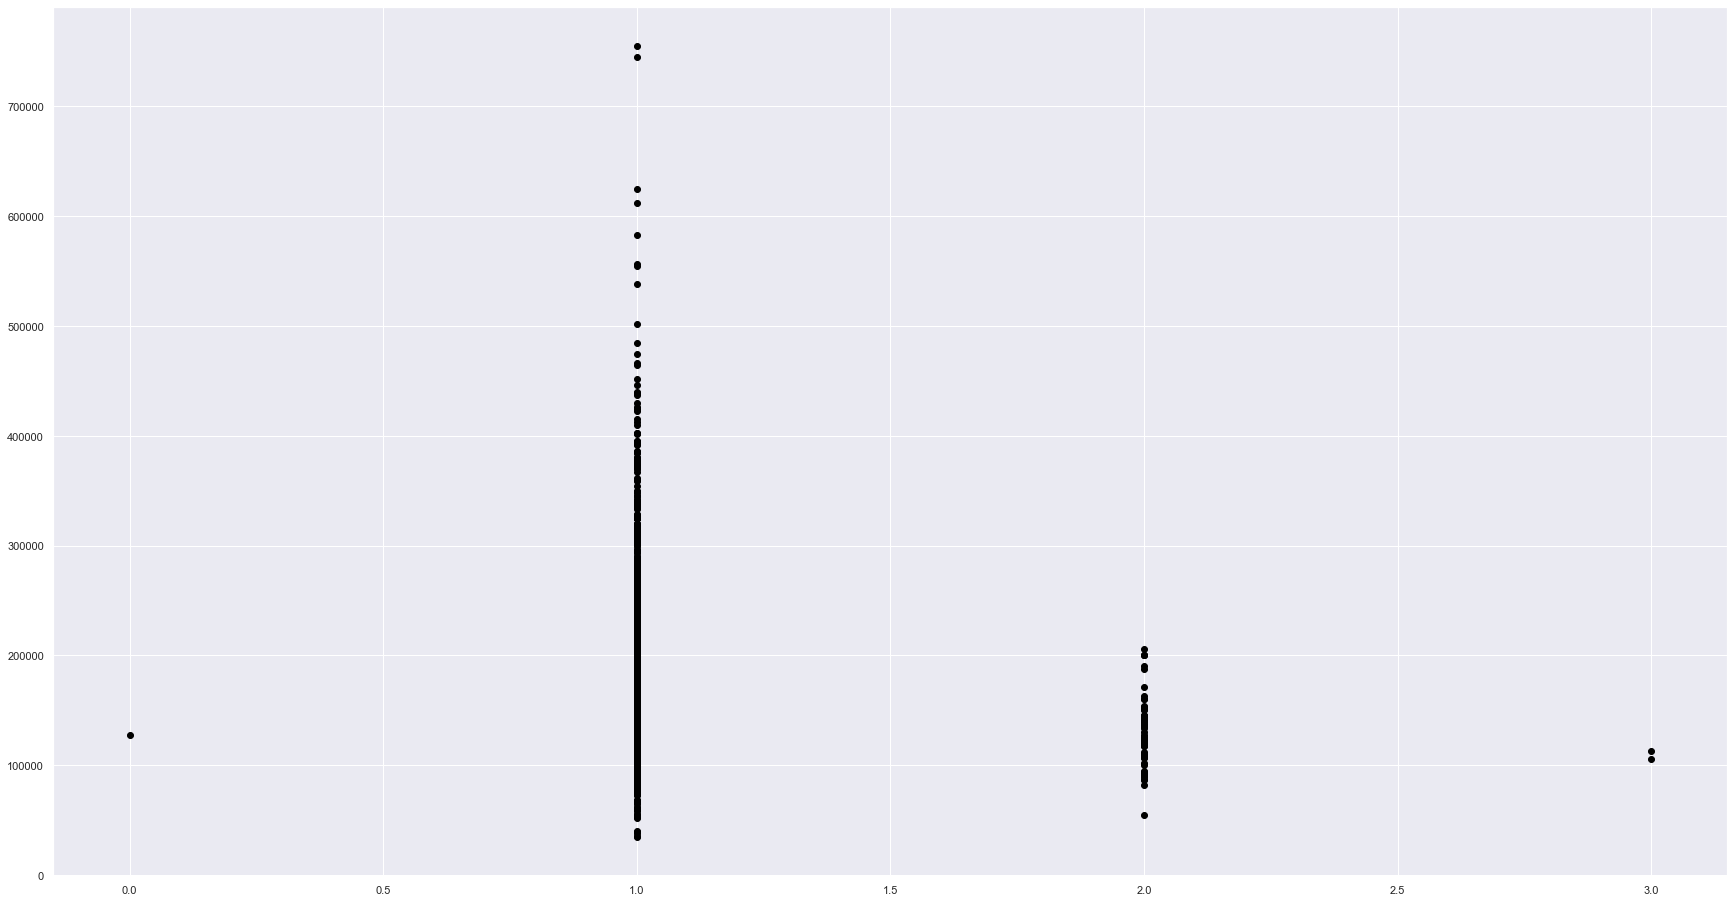

In [144]:
plt.scatter(df.KitchenAbvGr, df.SalePrice,  color='black')

In [145]:
lr2 = linear_model.LinearRegression()

# Fit the linear regression model object to our data
lr2.fit(X_train2, y_train2)

LinearRegression()

In [146]:
# The coefficients
print('Coefficients: \n', lr2.coef_)
print('Intercept: \n', lr2.intercept_)

Coefficients: 
 [-49050.08565217]
Intercept: 
 232280.02972094232


In [147]:
y_pred = lr2.predict([[1200]]) 
print(y_pred)

[-97867891.27460955]


In [148]:
meanSqur2 = mean_squared_error(X_test2, y_test2)
print(meanSqur2)

37387545831.12


In [149]:
##sum of 1460 data points
RMSE = np.sqrt(meanSqur2)
print(RMSE)

193358.59389000532


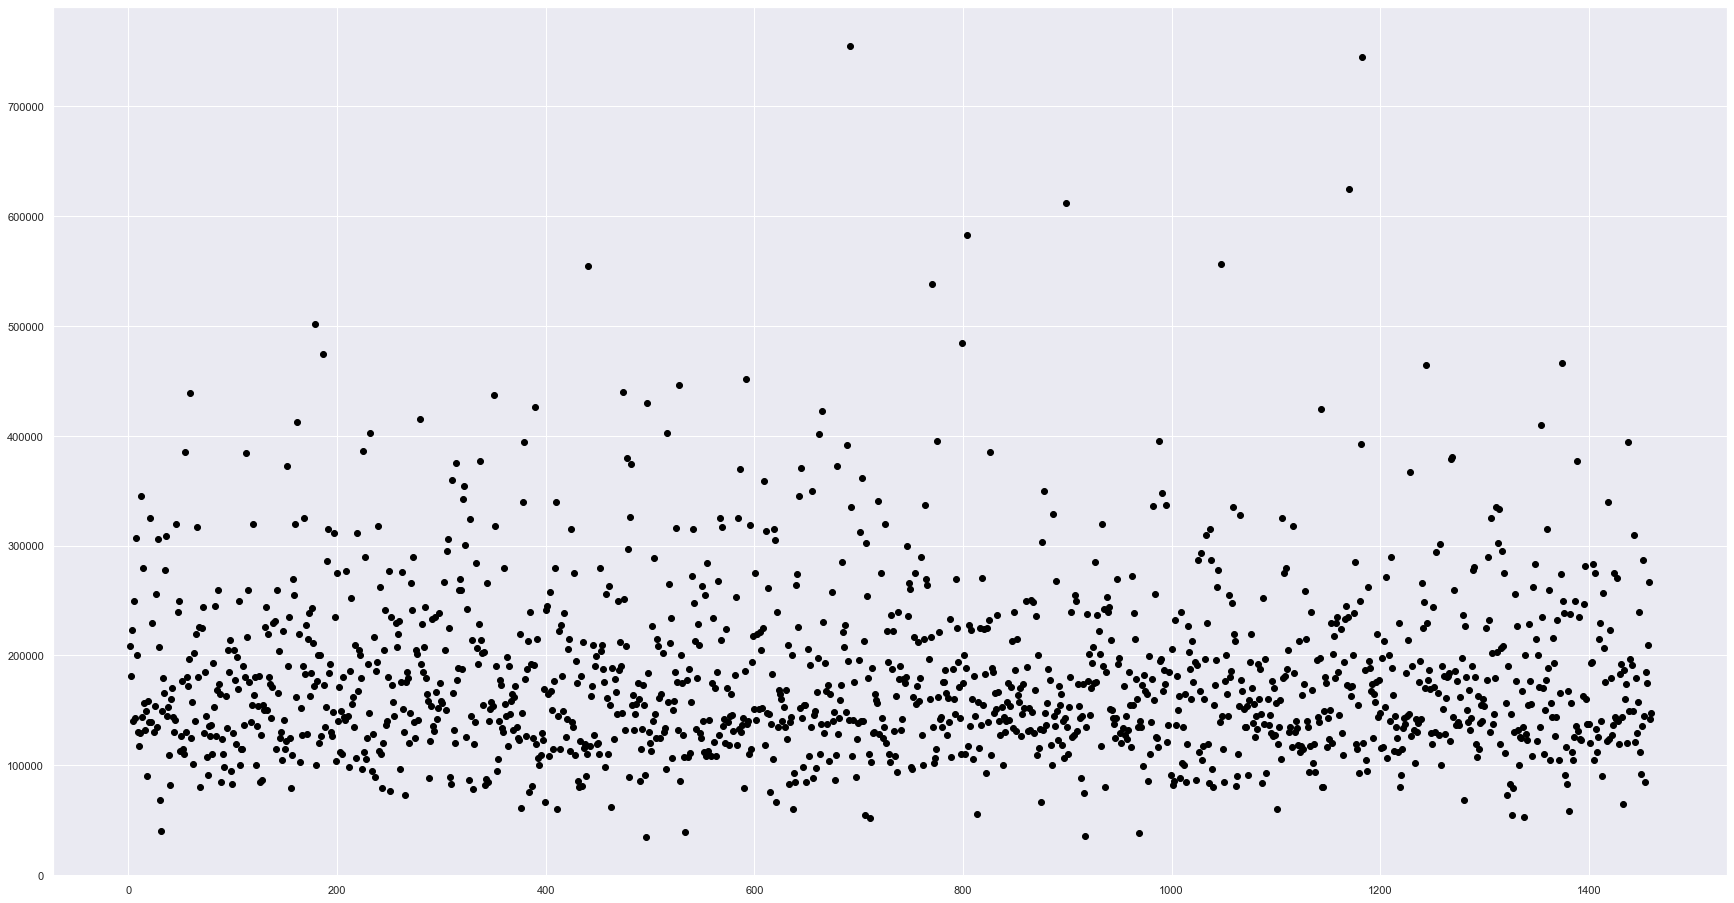

In [93]:
##Experiment 3
plt.scatter(df.Id, df.SalePrice,  color='black')

In [150]:
# Define our features and target
X3 = df[['Id']]
y3 = df['SalePrice']

# Split into train and test. By default, 75% of data is assigned to train, the other 25% to test.
X_train3 = X3[:-25]
X_test3 = X3[-25:]

y_train3 = y3[:-25]
y_test3 = y3[-25:]
#x_train, x_test, y_train, y_test = train_test_split(X, y)

In [151]:
lr3 = linear_model.LinearRegression()

# Fit the linear regression model object to our data
lr3.fit(X_test3, y_test3)

LinearRegression()

In [152]:
# The coefficients
print('Coefficients: \n', lr3.coef_)
print('Intercept: \n', lr3.intercept_)

Coefficients: 
 [-1412.87307692]
Intercept: 
 2225693.495384616


In [153]:
y_pred = lr3.predict([[1200]]) 
print(y_pred)

[-600052.65846154]


In [154]:
meanSqur3 = mean_squared_error(X_train3, y_train3)
print(meanSqur3)

38810357444.097565


In [155]:
##sum of 1460 data points
RMSE = np.sqrt(meanSqur3)
print(RMSE)

197003.4452594613
